# RKI Corona Daten

Link: https://npgeo-corona-npgeo-de.hub.arcgis.com/datasets/dd4580c810204019a7b8eb3e0b329dd6_0/data

Herunterladen -> Tabelle  (Datei 165MB groß (Stand 25.01.2021))

In [1]:
import pandas as pd

RKI_komplett = pd.read_csv("RKI_COVID19.csv")
RKI_komplett.head(5)

,IdBundesland,Bundesland,Landkreis,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,ObjectId,Meldedatum,IdLandkreis,Datenstand,NeuerFall,NeuerTodesfall,Refdatum,NeuGenesen,AnzahlGenesen,IstErkrankungsbeginn,Altersgruppe2
0,1,Schleswig-Holstein,SK Flensburg,A00-A04,M,1,0,1,2020/09/30 00:00:00+00,1001,"27.01.2021, 00:00 Uhr",0,-9,2020/09/30 00:00:00+00,0,1,0,Nicht übermittelt
1,1,Schleswig-Holstein,SK Flensburg,A00-A04,M,1,0,2,2020/10/29 00:00:00+00,1001,"27.01.2021, 00:00 Uhr",0,-9,2020/10/29 00:00:00+00,0,1,0,Nicht übermittelt
2,1,Schleswig-Holstein,SK Flensburg,A00-A04,M,1,0,3,2020/11/03 00:00:00+00,1001,"27.01.2021, 00:00 Uhr",0,-9,2020/11/03 00:00:00+00,0,1,0,Nicht übermittelt
3,1,Schleswig-Holstein,SK Kiel,A35-A59,M,1,0,4,2020/11/10 00:00:00+00,1002,"27.01.2021, 00:00 Uhr",0,-9,2020/11/10 00:00:00+00,0,1,0,Nicht übermittelt
4,1,Schleswig-Holstein,SK Flensburg,A00-A04,M,1,0,5,2020/11/20 00:00:00+00,1001,"27.01.2021, 00:00 Uhr",0,-9,2020/11/19 00:00:00+00,0,1,1,Nicht übermittelt


In [2]:
RKI_Landkreis = RKI_komplett.groupby(['Meldedatum','Bundesland','Landkreis']).agg({'AnzahlFall': ['sum']}).reset_index()
RKI_Landkreis.head()

,Meldedatum,Bundesland,Landkreis,AnzahlFall
,,,,sum
0,2020/01/02 00:00:00+00,Brandenburg,LK Dahme-Spreewald,1
1,2020/01/02 00:00:00+00,Brandenburg,LK Spree-Neiße,2
2,2020/01/02 00:00:00+00,Nordrhein-Westfalen,SK Bottrop,1
3,2020/01/02 00:00:00+00,Nordrhein-Westfalen,SK Köln,2
4,2020/01/03 00:00:00+00,Brandenburg,LK Dahme-Spreewald,1


In [3]:
RKI_Bundesland = RKI_komplett.groupby(['Meldedatum','Bundesland']).agg({'AnzahlFall': ['sum']}).reset_index()
RKI_Bundesland.head()

,Meldedatum,Bundesland,AnzahlFall
,,,sum
0,2020/01/02 00:00:00+00,Brandenburg,3
1,2020/01/02 00:00:00+00,Nordrhein-Westfalen,3
2,2020/01/03 00:00:00+00,Brandenburg,1
3,2020/01/03 00:00:00+00,Nordrhein-Westfalen,5
4,2020/01/04 00:00:00+00,Nordrhein-Westfalen,3


In [4]:
RKI_Deutschland = RKI_komplett.groupby(['Meldedatum']).agg({'AnzahlFall': ['sum']}).reset_index()
RKI_Deutschland['Meldedatum'] = pd.to_datetime(RKI_Deutschland['Meldedatum'],format='%Y/%m/%d')
RKI_Deutschland.columns = ['Meldedatum','Neue Fallzahlen']
RKI_Deutschland["Neue Fallzahlen"] = RKI_Deutschland["Neue Fallzahlen"].astype(int)
# Rollenden Mittelwert (7 Tage) 
#(fillna(0) -> ersten Werte werden mit NaN ausgegeben und geben uns einen Fehler beim konvertieren in integer)
#daher werden diese mit Nullen aufgefüllt damit die konvertierung zum integer funktoniert
RKI_Deutschland["Neue Fallzahlen Mittelwert (7 Tage)"] = RKI_Deutschland["Neue Fallzahlen"].rolling(7).mean().fillna(0)
RKI_Deutschland["Neue Fallzahlen Mittelwert (7 Tage)"] = RKI_Deutschland["Neue Fallzahlen Mittelwert (7 Tage)"].astype(int)
RKI_Deutschland["Faelle gesamt"] = RKI_Deutschland["Neue Fallzahlen"].cumsum(axis = 0) 

RKI_Deutschland.to_csv("RKI_Corona_Deutschland.csv", index=False)

RKI_Deutschland.head()

,Meldedatum,Neue Fallzahlen,Neue Fallzahlen Mittelwert (7 Tage),Faelle gesamt
0,2020-01-02 00:00:00+00:00,6,0,6
1,2020-01-03 00:00:00+00:00,6,0,12
2,2020-01-04 00:00:00+00:00,3,0,15
3,2020-01-05 00:00:00+00:00,1,0,16
4,2020-01-06 00:00:00+00:00,2,0,18


## import

In [5]:
RKI_Deutschland = pd.read_csv("RKI_Corona_Deutschland.csv")
RKI_Deutschland['Meldedatum'] = pd.to_datetime(RKI_Deutschland['Meldedatum'])

RKI_Deutschland

,Meldedatum,Neue Fallzahlen,Neue Fallzahlen Mittelwert (7 Tage),Faelle gesamt
0,2020-01-02 00:00:00+00:00,6,0,6
1,2020-01-03 00:00:00+00:00,6,0,12
2,2020-01-04 00:00:00+00:00,3,0,15
3,2020-01-05 00:00:00+00:00,1,0,16
4,2020-01-06 00:00:00+00:00,2,0,18
...,...,...,...,...
372,2021-01-22 00:00:00+00:00,14862,14093,2128068
373,2021-01-23 00:00:00+00:00,11486,13819,2139554
374,2021-01-24 00:00:00+00:00,4934,13579,2144488
375,2021-01-25 00:00:00+00:00,6231,13160,2150719


# Plot Corona Fallzahlen für Deutschland (Quelle: RKI)

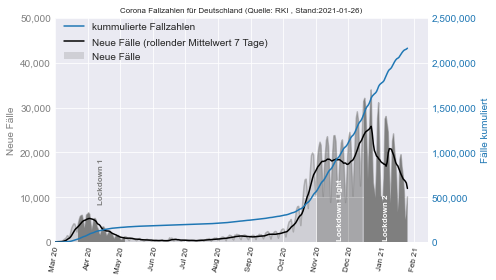

In [6]:
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import matplotlib.ticker as tkr 

# Allgemein
plt.style.use('seaborn-darkgrid') # default stil einstellen (auch andere stile z.B. auch "seaborn-darkgrid" möglich )

# Set Figure
fig , ax1 = plt.subplots(figsize=(7,4))

# Plot 1 : ax1 - neue Fälle

# Plot
ax1.plot(RKI_Deutschland["Meldedatum"],RKI_Deutschland["Neue Fallzahlen"], color='tab:gray', alpha=0.5)
ax1.fill_between(RKI_Deutschland["Meldedatum"], RKI_Deutschland["Neue Fallzahlen"], 0, facecolor ='tab:gray', alpha=0.25, zorder=-99, label="Neue Fälle") 
ax1.plot(RKI_Deutschland["Meldedatum"],RKI_Deutschland["Neue Fallzahlen Mittelwert (7 Tage)"], label="Neue Fälle (rollender Mittelwert 7 Tage)", color="black", alpha=1)

# Plot 2 : ax2 - Fälle kumuliert
ax2 = ax1.twinx()

# Plot
ax2.plot(RKI_Deutschland["Meldedatum"],RKI_Deutschland["Faelle gesamt"], color='tab:blue',label="kummulierte Fallzahlen", zorder=99)
ax2.grid()

# Legenden
ax1.legend(bbox_to_anchor=(0, 0.95), loc='upper left')
ax2.legend(bbox_to_anchor=(0, 0.9), loc='lower left')

# Lockdowns einzeichnen
Lockdown1=RKI_Deutschland.loc[(RKI_Deutschland["Meldedatum"] >= "2020-03-23") & (RKI_Deutschland["Meldedatum"] <= "2020-05-06")]
ax1.fill_between(Lockdown1["Meldedatum"], Lockdown1["Neue Fallzahlen"], 0, facecolor ='tab:gray', alpha=1) 
ax1.text(dates.date2num(Lockdown1.iloc[round(len(Lockdown1)/2),0]), Lockdown1.iloc[0,2]+5000, 'Lockdown 1', fontsize=8,  color='tab:gray', alpha=1, rotation=90, ha="center", va="bottom", weight='bold')

Lockdown2L=RKI_Deutschland.loc[(RKI_Deutschland["Meldedatum"] >= "2020-11-02") & (RKI_Deutschland["Meldedatum"] <= "2020-12-15")]
ax1.fill_between(Lockdown2L["Meldedatum"], Lockdown2L["Neue Fallzahlen"], 0, facecolor ='tab:gray', alpha=0.5) 
ax1.text(dates.date2num(Lockdown2L.iloc[round(len(Lockdown2L)/2),0]), 500, 'Lockdown Light', fontsize=8,  color='white', alpha=1, rotation=90, ha="center", va="bottom", weight='bold')

Lockdown2=RKI_Deutschland.loc[(RKI_Deutschland["Meldedatum"] >= "2020-12-16")]
ax1.fill_between(Lockdown2["Meldedatum"], Lockdown2["Neue Fallzahlen"], 0, facecolor ='tab:gray', alpha=1) 
ax1.text(dates.date2num(Lockdown2.iloc[round(len(Lockdown2)/2),0]), 500, 'Lockdown 2', fontsize=8,  color='white', alpha=1, rotation=90, ha="center", va="bottom", weight='bold')


# Zahlen der y-Achse Tausend mit Komma trennen
ax1.get_yaxis().set_major_formatter(tkr.FuncFormatter(lambda x, p: format(int(x), ",")))
ax2.get_yaxis().set_major_formatter(tkr.FuncFormatter(lambda x, p: format(int(x), ",")))

# Farben der zwei y-Achsen anpassen (mit Beschriftung)
ax1.set_ylabel('Neue Fälle', color='tab:gray')
ax2.set_ylabel("Fälle kumuliert", color='tab:blue')
ax1.tick_params(colors='tab:gray', which='both', axis="y") 
ax2.tick_params(colors='tab:blue', which='both', axis="y") 

# x ticks Anpassen
ax1.set_xlim(left=dates.date2num(RKI_Deutschland.loc[RKI_Deutschland["Meldedatum"] == "2020-03-01","Meldedatum"].item())) # x-Achse

# y ticks Anpassen
ax1.set_ylim(bottom=0, top=0.05e6) # Achse 2 Limits
ax2.set_ylim(bottom=0, top=2.5e6) # Achse 1 Limits

nticks=6 # Anzahl Ticks für Achse 1 und 2
ax1.yaxis.set_major_locator(tkr.LinearLocator(nticks))
ax2.yaxis.set_major_locator(tkr.LinearLocator(nticks))

# x ticks Anpassen
ax1.xaxis.set_major_locator(dates.MonthLocator(interval=1)) # jeden Monat ein Tick
ax1.xaxis.set_major_formatter(dates.DateFormatter('%b %y')) # Darstellung Monatsnamekurz + Jahr

# x Tick Schrift Formatierung (Variante 1: eigene Einstellungen)
labels = ax1.get_xticklabels(); # labels auslesen um diese noch mal zu formatieren
plt.setp(labels, rotation=80, fontsize=8); # Labels drehen

# x Tick Schrift Formatierung (Variante 2: automatisch)
#fig.autofmt_xdate()

# title
last_date = RKI_Deutschland.iloc[-1,0].strftime('%Y-%m-%d') # letztes Datum als Datenstand
ax1.set_title("Corona Fallzahlen für Deutschland (Quelle: RKI , Stand:"+last_date+")", fontsize=8)

plt.tight_layout()
plt.savefig('Deutschland_RKI-Coronazahlen_Stand'+last_date+'.png', bbox_inches='tight', dpi=150)
plt.show()

## Vergleichen Zahlen RKI vs Johns Hokpkins Universitaet

### Johns Hopkins Daten einlesen

In [8]:
JH_Deutschland = pd.read_csv("WHO_Corona_Deutschland.csv")
JH_Deutschland["Date"]= pd.to_datetime(JH_Deutschland["Date"]) 
JH_Deutschland["New cases (7 days rolling mean)"] = JH_Deutschland["New cases"].rolling(7).mean().fillna(0)
JH_Deutschland.head()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,New cases (7 days rolling mean)
0,2020-01-22,Germany,0,0,0.0,0.0,0,0,0,0.0
1,2020-01-23,Germany,0,0,0.0,0.0,0,0,0,0.0
2,2020-01-24,Germany,0,0,0.0,0.0,0,0,0,0.0
3,2020-01-25,Germany,0,0,0.0,0.0,0,0,0,0.0
4,2020-01-26,Germany,0,0,0.0,0.0,0,0,0,0.0


### Plot

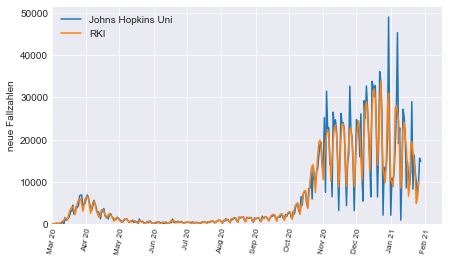

In [9]:
import matplotlib.pyplot as plt
import matplotlib.dates as dates
#import matplotlib.ticker as tkr 

# Allgemein
plt.style.use('seaborn-darkgrid') 

fig , ax = plt.subplots(figsize=(7,4))

# Plots
ax.plot(JH_Deutschland["Date"],JH_Deutschland["New cases"], label="Johns Hopkins Uni")
ax.plot(RKI_Deutschland["Meldedatum"],RKI_Deutschland["Neue Fallzahlen"], label="RKI")

# Legende
ax.legend()

# y Label
ax.set_ylabel("neue Fallzahlen")

# x ticks Anpassen
ax.set_xlim(left=dates.date2num(RKI_Deutschland.loc[RKI_Deutschland["Meldedatum"] == "2020-03-01","Meldedatum"].item())) # x-Achse

# y ticks Anpassen
ax.set_ylim(bottom=0) 

# x ticks Anpassen
ax.xaxis.set_major_locator(dates.MonthLocator(interval=1)) # jeden Monat ein Tick
ax.xaxis.set_major_formatter(dates.DateFormatter('%b %y')) # Darstellung Monatsnamekurz + Jahr

# x Tick Schrift Formatierung (Variante 1: eigene Einstellungen)
labels = ax.get_xticklabels(); # labels auslesen um diese noch mal zu formatieren
plt.setp(labels, rotation=80, fontsize=8); # Labels drehen

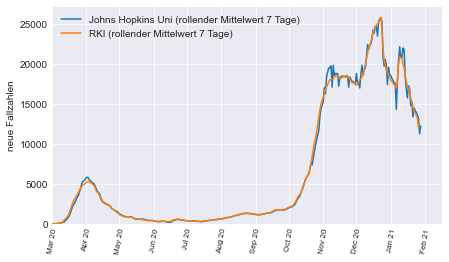

In [10]:
import matplotlib.pyplot as plt
import matplotlib.dates as dates
#import matplotlib.ticker as tkr 

# Allgemein
plt.style.use('seaborn-darkgrid') 

fig , ax = plt.subplots(figsize=(7,4))

# Plots
ax.plot(JH_Deutschland["Date"],JH_Deutschland["New cases (7 days rolling mean)"], label="Johns Hopkins Uni (rollender Mittelwert 7 Tage)")
ax.plot(RKI_Deutschland["Meldedatum"],RKI_Deutschland["Neue Fallzahlen Mittelwert (7 Tage)"], label="RKI (rollender Mittelwert 7 Tage)")

# Legende
ax.legend()

# y Label
ax.set_ylabel("neue Fallzahlen")

# x ticks Anpassen
ax.set_xlim(left=dates.date2num(RKI_Deutschland.loc[RKI_Deutschland["Meldedatum"] == "2020-03-01","Meldedatum"].item())) # x-Achse

# y ticks Anpassen
ax.set_ylim(bottom=0) 

# x ticks Anpassen
ax.xaxis.set_major_locator(dates.MonthLocator(interval=1)) # jeden Monat ein Tick
ax.xaxis.set_major_formatter(dates.DateFormatter('%b %y')) # Darstellung Monatsnamekurz + Jahr

# x Tick Schrift Formatierung (Variante 1: eigene Einstellungen)
labels = ax.get_xticklabels(); # labels auslesen um diese noch mal zu formatieren
plt.setp(labels, rotation=80, fontsize=8); # Labels drehen

# Inzidenzwert für die Bundesländer bestimmen

In [11]:

RKI_Bundesland.columns=["Meldedatum","Bundesland","Neue Fallzahlen"]
RKI_Bundesland['Meldedatum'] = pd.to_datetime(RKI_Bundesland['Meldedatum'],format='%Y/%m/%d')
RKI_Bundesland

,Meldedatum,Bundesland,Neue Fallzahlen
0,2020-01-02 00:00:00+00:00,Brandenburg,3
1,2020-01-02 00:00:00+00:00,Nordrhein-Westfalen,3
2,2020-01-03 00:00:00+00:00,Brandenburg,1
3,2020-01-03 00:00:00+00:00,Nordrhein-Westfalen,5
4,2020-01-04 00:00:00+00:00,Nordrhein-Westfalen,3
...,...,...,...
5215,2021-01-26 00:00:00+00:00,Saarland,172
5216,2021-01-26 00:00:00+00:00,Sachsen,540
5217,2021-01-26 00:00:00+00:00,Sachsen-Anhalt,224
5218,2021-01-26 00:00:00+00:00,Schleswig-Holstein,494


## Rollenden Mittelwert für jedes Bundesland

Quelle Einwohner: https://www.destatis.de/DE/Themen/Gesellschaft-Umwelt/Bevoelkerung/Bevoelkerungsstand/Tabellen/bevoelkerung-nichtdeutsch-laender.html

In [12]:
Bundeslaender = RKI_Bundesland["Bundesland"].unique()

li = []
for i in Bundeslaender:
    df = RKI_Bundesland.loc[RKI_Bundesland["Bundesland"] == i]
    df["Neue Fallzahlen Mittelwert (7 Tage)"] = df["Neue Fallzahlen"].rolling(7).mean().fillna(0)
    df["Neue Fallzahlen Summe (7 Tage)"] = df["Neue Fallzahlen"].rolling(7).sum().fillna(0)
    df["Neue Fallzahlen Mittelwert (7 Tage)"] = df["Neue Fallzahlen Mittelwert (7 Tage)"].astype(int)
    df["Neue Fallzahlen Summe (7 Tage)"] = df["Neue Fallzahlen Summe (7 Tage)"].astype(int)
    df["Faelle gesamt"] = df["Neue Fallzahlen"].cumsum(axis = 0) 
    
    if i == "Brandenburg":
        Einwohner=2521893
    if i == "Nordrhein-Westfalen":
        Einwohner=17947221
    if i == "Baden-Württemberg":
        Einwohner=11100394
    if i == "Saarland":
        Einwohner=986887
    if i == "Sachsen":
        Einwohner=4071971
    if i == "Bayern":
        Einwohner=13124737
    if i == "Niedersachsen":
        Einwohner=7993608
    if i == "Hessen":
        Einwohner=6288080
    if i == "Rheinland-Pfalz":
        Einwohner=4093903
    if i == "Schleswig-Holstein":
        Einwohner=2903773
    if i == "Hamburg":
        Einwohner=1847253
    if i == "Bremen":
        Einwohner=681202
    if i == "Berlin":
        Einwohner=3669491
    if i == "Mecklenburg-Vorpommern":
        Einwohner=1608138
    if i == "Thüringen":
        Einwohner=2133378
    if i == "Sachsen-Anhalt":
        Einwohner=2194782
    
    df["7 Tage Indizdenz"] = df["Neue Fallzahlen Summe (7 Tage)"]/Einwohner*100000
    df["7 Tage Indizdenz"] = df["7 Tage Indizdenz"].round(0)

    li.append(df)

# Dataframe zusammenführen
Bundeslaender_RM7 = pd.concat(li, axis=0, ignore_index=True)
Bundeslaender_RM7

,Meldedatum,Bundesland,Neue Fallzahlen,Neue Fallzahlen Mittelwert (7 Tage),Neue Fallzahlen Summe (7 Tage),Faelle gesamt,7 Tage Indizdenz
0,2020-01-02 00:00:00+00:00,Brandenburg,3,0,0,3,0.0
1,2020-01-03 00:00:00+00:00,Brandenburg,1,0,0,4,0.0
2,2020-01-06 00:00:00+00:00,Brandenburg,1,0,0,5,0.0
3,2020-01-07 00:00:00+00:00,Brandenburg,1,0,0,6,0.0
4,2020-01-11 00:00:00+00:00,Brandenburg,1,0,0,7,0.0
...,...,...,...,...,...,...,...
5215,2021-01-22 00:00:00+00:00,Thüringen,673,662,4638,61428,217.0
5216,2021-01-23 00:00:00+00:00,Thüringen,479,638,4469,61907,209.0
5217,2021-01-24 00:00:00+00:00,Thüringen,226,629,4407,62133,207.0
5218,2021-01-25 00:00:00+00:00,Thüringen,297,605,4237,62430,199.0


# Plot Bundesländer

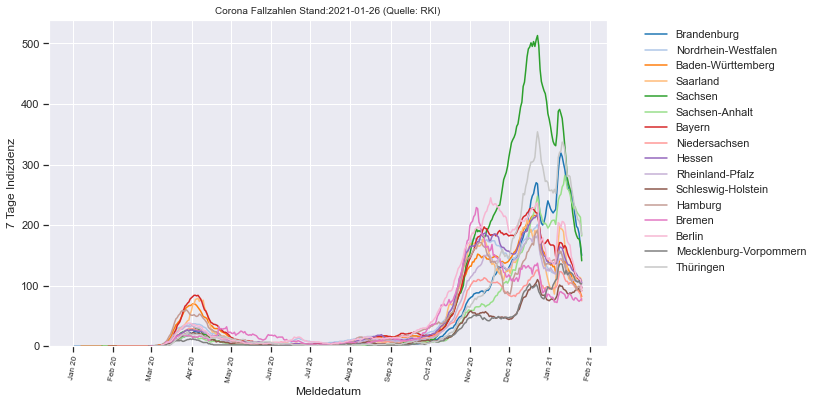

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context("notebook")

fig , ax = plt.subplots(figsize=(10,6))

ax = sns.lineplot(data=Bundeslaender_RM7,x="Meldedatum", y="7 Tage Indizdenz", hue="Bundesland", palette="tab20")

# Legende
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# y ticks Anpassen
ax.set_ylim(bottom=0) 

# x ticks Anpassen
ax.xaxis.set_major_locator(dates.MonthLocator(interval=1)) # jeden Monat ein Tick
ax.xaxis.set_major_formatter(dates.DateFormatter('%b %y')) # Darstellung Monatsnamekurz + Jahr

# x Tick Schrift Formatierung (Variante 1: eigene Einstellungen)
labels = ax.get_xticklabels(); # labels auslesen um diese noch mal zu formatieren
plt.setp(labels, rotation=80, fontsize=8); # Labels drehen

# title
last_date = Bundeslaender_RM7.iloc[-1,0].strftime('%Y-%m-%d') # letztes Datum als Datenstand
ax.set_title("Corona Fallzahlen Stand:"+last_date+" (Quelle: RKI)", fontsize=10)

plt.savefig('Bundeslaender_Verlauf_RKI-Coronazahlen_Stand'+last_date+'.png', bbox_inches='tight', dpi=150)
plt.show()


# Plot Aktuelle Zahlen Bundesländer

In [14]:
Bundeslaender_RM7_today=Bundeslaender_RM7.loc[Bundeslaender_RM7["Meldedatum"]=="2021-01-25"].sort_values(by="7 Tage Indizdenz", ascending=False).reset_index(drop=True)
Bundeslaender_RM7_today


,Meldedatum,Bundesland,Neue Fallzahlen,Neue Fallzahlen Mittelwert (7 Tage),Neue Fallzahlen Summe (7 Tage),Faelle gesamt,7 Tage Indizdenz
0,2021-01-25 00:00:00+00:00,Sachsen-Anhalt,506,668,4682,49171,213.0
1,2021-01-25 00:00:00+00:00,Thüringen,297,605,4237,62430,199.0
2,2021-01-25 00:00:00+00:00,Sachsen,359,980,6862,175468,169.0
3,2021-01-25 00:00:00+00:00,Brandenburg,263,595,4165,64596,165.0
4,2021-01-25 00:00:00+00:00,Saarland,66,159,1113,24486,113.0
5,2021-01-25 00:00:00+00:00,Hessen,368,995,6965,166607,111.0
6,2021-01-25 00:00:00+00:00,Berlin,616,575,4026,117409,110.0
7,2021-01-25 00:00:00+00:00,Bayern,687,1990,13934,391997,106.0
8,2021-01-25 00:00:00+00:00,Nordrhein-Westfalen,1425,2670,18694,472752,104.0
9,2021-01-25 00:00:00+00:00,Rheinland-Pfalz,324,606,4247,89971,104.0


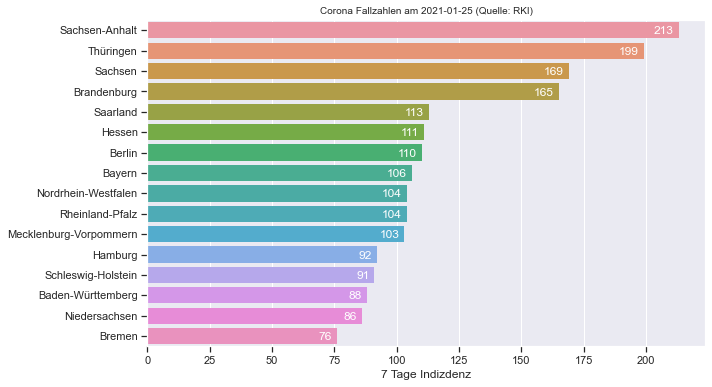

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_context("notebook")


def show_values_on_bars(axs, h_v="v", space=0.4, space2=0):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() / 2 + float(space2)
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="right", va="center", c="white")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

fig , ax = plt.subplots(figsize=(10,6))

ax = sns.barplot(data=Bundeslaender_RM7_today,y="Bundesland", x="7 Tage Indizdenz")

show_values_on_bars(ax, "h", -2,0.05) # Zahlen hinzufügen

# title
last_date = Bundeslaender_RM7_today.iloc[-1,0].strftime('%Y-%m-%d') # letztes Datum als Datenstand
ax.set_title("Corona Fallzahlen am "+last_date+" (Quelle: RKI)", fontsize=10)

# Label
ax.set_ylabel("")

plt.savefig('Bundeslaender_RKI-Coronazahlen_Stand'+last_date+'.png', bbox_inches='tight', dpi=150)
plt.show()

# Plot 7 Tage Inzidenz Leipzig

## Daten importieren

In [16]:
Leipzig = RKI_komplett.loc[RKI_komplett["Landkreis"] == "SK Leipzig"]
Leipzig = Leipzig.groupby(['Meldedatum']).agg({'AnzahlFall': ['sum']}).reset_index()
Leipzig['Meldedatum'] = pd.to_datetime(Leipzig['Meldedatum'],format='%Y/%m/%d')
Leipzig.columns = ['Meldedatum','Neue Fallzahlen']
Leipzig["Neue Fallzahlen Mittelwert (7 Tage)"] = Leipzig["Neue Fallzahlen"].rolling(7).mean().fillna(0)
Leipzig["Neue Fallzahlen Mittelwert (7 Tage)"] = Leipzig["Neue Fallzahlen Mittelwert (7 Tage)"].astype(int)
Leipzig["Neue Fallzahlen Summe (7 Tage)"] = Leipzig["Neue Fallzahlen"].rolling(7).sum().fillna(0)
Leipzig["Neue Fallzahlen Summe (7 Tage)"] = Leipzig["Neue Fallzahlen Summe (7 Tage)"].astype(int)
Leipzig["Faelle gesamt"] = Leipzig["Neue Fallzahlen"].cumsum(axis = 0) 
Einwohner = 605407  # Quelle: https://www.leipzig.de/news/news/leipzig-hat-jetzt-605407-einwohner/
Leipzig["7 Tage Indizdenz"] = Leipzig["Neue Fallzahlen Summe (7 Tage)"]/Einwohner*100000
Leipzig["7 Tage Indizdenz"] = Leipzig["7 Tage Indizdenz"].round(0)

Leipzig

,Meldedatum,Neue Fallzahlen,Neue Fallzahlen Mittelwert (7 Tage),Neue Fallzahlen Summe (7 Tage),Faelle gesamt,7 Tage Indizdenz
0,2020-03-06 00:00:00+00:00,1,0,0,1,0.0
1,2020-03-08 00:00:00+00:00,1,0,0,2,0.0
2,2020-03-10 00:00:00+00:00,2,0,0,4,0.0
3,2020-03-11 00:00:00+00:00,2,0,0,6,0.0
4,2020-03-12 00:00:00+00:00,10,0,0,16,0.0
...,...,...,...,...,...,...
247,2021-01-22 00:00:00+00:00,117,137,961,13207,159.0
248,2021-01-23 00:00:00+00:00,118,135,949,13325,157.0
249,2021-01-24 00:00:00+00:00,40,134,942,13365,156.0
250,2021-01-25 00:00:00+00:00,21,127,891,13386,147.0


## Vergleich RKI vs Leipzig.de Corona Zahlen

Stand 26.01.2021:

- **RKI** 7Tage Inzidenz: **146,84** (41 neue Fälle) (Total: 13366)
- **Leipzig.de** 7Tage Inzidenz: **153,1** (22 Neue Fälle) 
- **eigene Rechnung** 7Tage Inzidenz: **156.0** (40 neue Fälle) (Total: 13366)

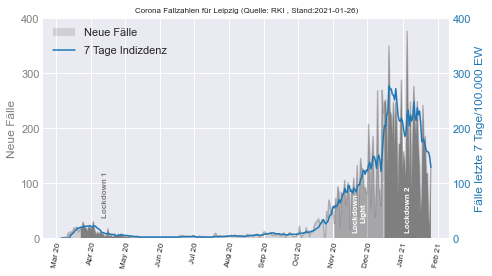

In [17]:
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import matplotlib.ticker as tkr 

# Allgemein
plt.style.use('seaborn-darkgrid') # default stil einstellen (auch andere stile z.B. auch "seaborn-darkgrid" möglich )

# Set Figure
fig , ax1 = plt.subplots(figsize=(7,4))

# Plot 1 : ax1 - neue Fälle

# Plot
ax1.plot(Leipzig["Meldedatum"],Leipzig["Neue Fallzahlen"], color='tab:gray', alpha=0.5)
ax1.fill_between(Leipzig["Meldedatum"], Leipzig["Neue Fallzahlen"], 0, facecolor ='tab:gray', alpha=0.25, zorder=-99, label="Neue Fälle") 

# Plot 2 : ax2 - Fälle kumuliert
ax2 = ax1.twinx()

# Plot
ax2.plot(Leipzig["Meldedatum"],Leipzig["7 Tage Indizdenz"], color='tab:blue',label="7 Tage Indizdenz", zorder=99)
ax2.grid()

# Legenden
ax1.legend(bbox_to_anchor=(0, 1.0), loc='upper left')
ax2.legend(bbox_to_anchor=(0, 0.92), loc='upper left')

# Lockdowns einzeichnen
Lockdown1=Leipzig.loc[(Leipzig["Meldedatum"] >= "2020-03-23") & (Leipzig["Meldedatum"] <= "2020-05-06")]
ax1.fill_between(Lockdown1["Meldedatum"], Lockdown1["Neue Fallzahlen"], 0, facecolor ='tab:gray', alpha=1) 
ax1.text(dates.date2num(Lockdown1.iloc[round(len(Lockdown1)/2),0]), Lockdown1.iloc[0,2]+20, 'Lockdown 1', fontsize=8,  color='tab:gray', alpha=1, rotation=90, ha="center", va="bottom", weight='bold')

Lockdown2L=Leipzig.loc[(Leipzig["Meldedatum"] >= "2020-11-02") & (Leipzig["Meldedatum"] <= "2020-12-15")]
ax1.fill_between(Lockdown2L["Meldedatum"], Lockdown2L["Neue Fallzahlen"], 0, facecolor ='tab:gray', alpha=0.5) 
ax1.text(dates.date2num(Lockdown2L.iloc[round(len(Lockdown2L)/2),0]), 10, 'Lockdown\nLight', fontsize=8,  color='white', alpha=1, rotation=90, ha="center", va="bottom", weight='bold')

Lockdown2=Leipzig.loc[(Leipzig["Meldedatum"] >= "2020-12-16")]
ax1.fill_between(Lockdown2["Meldedatum"], Lockdown2["Neue Fallzahlen"], 0, facecolor ='tab:gray', alpha=1) 
ax1.text(dates.date2num(Lockdown2.iloc[round(len(Lockdown2)/2),0]), 10, 'Lockdown 2', fontsize=8,  color='white', alpha=1, rotation=90, ha="center", va="bottom", weight='bold')


# Zahlen der y-Achse Tausend mit Komma trennen
ax1.get_yaxis().set_major_formatter(tkr.FuncFormatter(lambda x, p: format(int(x), ",")))
ax2.get_yaxis().set_major_formatter(tkr.FuncFormatter(lambda x, p: format(int(x), ",")))

# Farben der zwei y-Achsen anpassen (mit Beschriftung)
ax1.set_ylabel('Neue Fälle', color='tab:gray')
ax2.set_ylabel("Fälle letzte 7 Tage/100.000 EW", color='tab:blue')
ax1.tick_params(colors='tab:gray', which='both', axis="y") 
ax2.tick_params(colors='tab:blue', which='both', axis="y") 

# y ticks Anpassen
ax1.set_ylim(bottom=0, top=400) # Achse 2 Limits
ax2.set_ylim(bottom=0, top=400) # Achse 1 Limits

nticks=5 # Anzahl Ticks für Achse 1 und 2
ax1.yaxis.set_major_locator(tkr.LinearLocator(nticks))
ax2.yaxis.set_major_locator(tkr.LinearLocator(nticks))

# x ticks Anpassen
ax1.xaxis.set_major_locator(dates.MonthLocator(interval=1)) # jeden Monat ein Tick
ax1.xaxis.set_major_formatter(dates.DateFormatter('%b %y')) # Darstellung Monatsnamekurz + Jahr

# x Tick Schrift Formatierung (Variante 1: eigene Einstellungen)
labels = ax1.get_xticklabels(); # labels auslesen um diese noch mal zu formatieren
plt.setp(labels, rotation=80, fontsize=8); # Labels drehen

# x Tick Schrift Formatierung (Variante 2: automatisch)
#fig.autofmt_xdate()

# title
last_date = Leipzig.iloc[-1,0].strftime('%Y-%m-%d') # letztes Datum als Datenstand
ax1.set_title("Corona Fallzahlen für Leipzig (Quelle: RKI , Stand:"+last_date+")", fontsize=8)

plt.tight_layout()
plt.savefig('Leipzig_RKI-Coronazahlen_Stand'+last_date+'.png', bbox_inches='tight', dpi=150)
plt.show()

## Projektion auf Zero Covid

In [18]:
Letzte5Tage = Leipzig.tail(5).reset_index(drop=True)
Letzte5Tage

,Meldedatum,Neue Fallzahlen,Neue Fallzahlen Mittelwert (7 Tage),Neue Fallzahlen Summe (7 Tage),Faelle gesamt,7 Tage Indizdenz
0,2021-01-22 00:00:00+00:00,117,137,961,13207,159.0
1,2021-01-23 00:00:00+00:00,118,135,949,13325,157.0
2,2021-01-24 00:00:00+00:00,40,134,942,13365,156.0
3,2021-01-25 00:00:00+00:00,21,127,891,13386,147.0
4,2021-01-26 00:00:00+00:00,130,111,780,13516,129.0


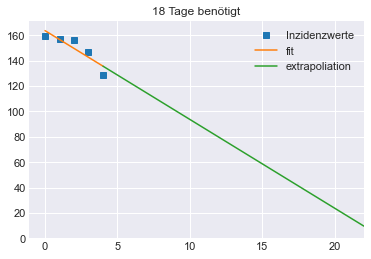

In [19]:
import numpy as np
from datetime import datetime, timedelta 

# fit
m,b = np.polyfit(Letzte5Tage.index, Letzte5Tage["7 Tage Indizdenz"], 1)

# Tage bis zum Wert Null (gerundet)
Tage = int(np.round((Letzte5Tage["7 Tage Indizdenz"].iloc[-1])/abs(m)))
x=np.linspace(4, Tage+4, num=2)

plt.plot(Letzte5Tage.index,Letzte5Tage["7 Tage Indizdenz"],ls="",marker="s",label="Inzidenzwerte")
plt.plot(Letzte5Tage.index,m*Letzte5Tage.index+b,label="fit")
plt.plot(x,m*x+b,label="extrapoliation")
plt.xlim(right=Tage+4)
plt.ylim(bottom=0)
plt.legend()
plt.title(str(Tage)+" Tage benötigt")
plt.show()

In [20]:
ZeroCovidDate = Leipzig["Meldedatum"].iloc[-1] + timedelta(days=Tage)

Extrapolation = pd.DataFrame({"Meldedatum":[Leipzig["Meldedatum"].iloc[-1],ZeroCovidDate], "7 Tage Indizdenz":[Leipzig["7 Tage Indizdenz"].iloc[-1],0]})
Extrapolation

,Meldedatum,7 Tage Indizdenz
0,2021-01-26 00:00:00+00:00,129.0
1,2021-02-13 00:00:00+00:00,0.0


## Plot mit Zero Covid Projektion

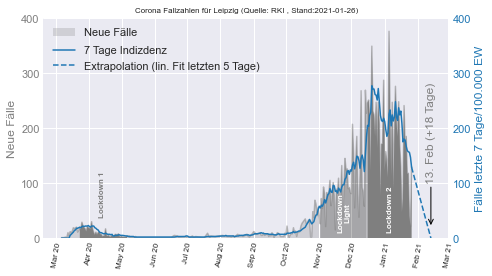

In [21]:
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import matplotlib.ticker as tkr 

# Allgemein
plt.style.use('seaborn-darkgrid') # default stil einstellen (auch andere stile z.B. auch "seaborn-darkgrid" möglich )

# Set Figure
fig , ax1 = plt.subplots(figsize=(7,4))

# Plot 1 : ax1 - neue Fälle

# Plot
ax1.plot(Leipzig["Meldedatum"],Leipzig["Neue Fallzahlen"], color='tab:gray', alpha=0.5)
ax1.fill_between(Leipzig["Meldedatum"], Leipzig["Neue Fallzahlen"], 0, facecolor ='tab:gray', alpha=0.25, zorder=-99, label="Neue Fälle") 

# Plot 2 : ax2 - Fälle kumuliert
ax2 = ax1.twinx()

# Plot
ax2.plot(Leipzig["Meldedatum"],Leipzig["7 Tage Indizdenz"], color='tab:blue',label="7 Tage Indizdenz", zorder=99)
ax2.plot(Extrapolation["Meldedatum"],Extrapolation["7 Tage Indizdenz"], color='tab:blue',label="Extrapolation (lin. Fit letzten 5 Tage)",linestyle="--", zorder=99)
ax2.grid()

# Zero Covid Day
ax2.annotate(ZeroCovidDate.strftime("%d. %b")+" (+"+str(Tage)+" Tage)", xy =(dates.date2num(ZeroCovidDate), 20), 
                xytext=(dates.date2num(ZeroCovidDate), 100), 
                arrowprops=dict(facecolor="gray",arrowstyle="->"),
                color='tab:gray',
                rotation=90, 
                ha="center", 
                va="bottom") 


# Legenden
ax1.legend(bbox_to_anchor=(0, 1.0), loc='upper left')
ax2.legend(bbox_to_anchor=(0, 0.92), loc='upper left')

# Lockdowns einzeichnen
Lockdown1=Leipzig.loc[(Leipzig["Meldedatum"] >= "2020-03-23") & (Leipzig["Meldedatum"] <= "2020-05-06")]
ax1.fill_between(Lockdown1["Meldedatum"], Lockdown1["Neue Fallzahlen"], 0, facecolor ='tab:gray', alpha=1) 
ax1.text(dates.date2num(Lockdown1.iloc[round(len(Lockdown1)/2),0]), Lockdown1.iloc[0,2]+20, 'Lockdown 1', fontsize=8,  color='tab:gray', alpha=1, rotation=90, ha="center", va="bottom", weight='bold')

Lockdown2L=Leipzig.loc[(Leipzig["Meldedatum"] >= "2020-11-02") & (Leipzig["Meldedatum"] <= "2020-12-15")]
ax1.fill_between(Lockdown2L["Meldedatum"], Lockdown2L["Neue Fallzahlen"], 0, facecolor ='tab:gray', alpha=0.5) 
ax1.text(dates.date2num(Lockdown2L.iloc[round(len(Lockdown2L)/2),0]), 10, 'Lockdown\nLight', fontsize=8,  color='white', alpha=1, rotation=90, ha="center", va="bottom", weight='bold')

Lockdown2=Leipzig.loc[(Leipzig["Meldedatum"] >= "2020-12-16")]
ax1.fill_between(Lockdown2["Meldedatum"], Lockdown2["Neue Fallzahlen"], 0, facecolor ='tab:gray', alpha=1) 
ax1.text(dates.date2num(Lockdown2.iloc[round(len(Lockdown2)/2),0]), 10, 'Lockdown 2', fontsize=8,  color='white', alpha=1, rotation=90, ha="center", va="bottom", weight='bold')


# Zahlen der y-Achse Tausend mit Komma trennen
ax1.get_yaxis().set_major_formatter(tkr.FuncFormatter(lambda x, p: format(int(x), ",")))
ax2.get_yaxis().set_major_formatter(tkr.FuncFormatter(lambda x, p: format(int(x), ",")))

# Farben der zwei y-Achsen anpassen (mit Beschriftung)
ax1.set_ylabel('Neue Fälle', color='tab:gray')
ax2.set_ylabel("Fälle letzte 7 Tage/100.000 EW", color='tab:blue')
ax1.tick_params(colors='tab:gray', which='both', axis="y") 
ax2.tick_params(colors='tab:blue', which='both', axis="y") 

# y ticks Anpassen
ax1.set_ylim(bottom=0, top=400) # Achse 2 Limits
ax2.set_ylim(bottom=0, top=400) # Achse 1 Limits

nticks=5 # Anzahl Ticks für Achse 1 und 2
ax1.yaxis.set_major_locator(tkr.LinearLocator(nticks))
ax2.yaxis.set_major_locator(tkr.LinearLocator(nticks))

# x ticks Anpassen
ax1.xaxis.set_major_locator(dates.MonthLocator(interval=1)) # jeden Monat ein Tick
ax1.xaxis.set_major_formatter(dates.DateFormatter('%b %y')) # Darstellung Monatsnamekurz + Jahr

# x Tick Schrift Formatierung (Variante 1: eigene Einstellungen)
labels = ax1.get_xticklabels(); # labels auslesen um diese noch mal zu formatieren
plt.setp(labels, rotation=80, fontsize=8); # Labels drehen

# x Tick Schrift Formatierung (Variante 2: automatisch)
#fig.autofmt_xdate()

# title
last_date = Leipzig.iloc[-1,0].strftime('%Y-%m-%d') # letztes Datum als Datenstand
ax1.set_title("Corona Fallzahlen für Leipzig (Quelle: RKI , Stand:"+last_date+")", fontsize=8)

plt.tight_layout()
plt.savefig('Leipzig_mitExtrapolation_RKI-Coronazahlen_Stand'+last_date+'.png', bbox_inches='tight', dpi=150)
plt.show()